# Modeling

### Preliminary Modeling EDA and Engineering

- Fix imbalances
- Train/Test Split
- Encode Categorical Data
- Visualize data for potential patterns
- Check assumptions and data distribution
- dummy model
- DecisionTree to determine important predictors
- Model

# Business Understanding

Tanzania has struggled with finding a solution to their water crisis for years. Not only is the affordability of clean water an issue, but the infrastructre and maintenance for water has also proven to be a consistent problem for Tanzania. Our stakeholder is Water. Water is a non-government organization that is looking to implement the effectiveness of their water pumps. They want to see how to optimize their time and resources to effectively predict whether a water pump is functional, non existent, or just broken and needs repair. By understanding this distinction, our stakeholder will be able to deploy their resources effectively and efficiently.





In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# ignore warnings (there are a lot of them)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./00_Source_Data/data/df_clean.csv')

In [3]:
df.head()

,Unnamed: 0,is_new,extraction_type_class,amount_tsh,quantity,source_type,source_class,quality_group,population,target,funder,num_private,region,subvillage,scheme_management,scheme_class,permit,payment,source,installer
0,0,False,gravity,6000.0,enough,spring,groundwater,good,109,functional,Other,0,Iringa,Mnyusi B,VWC,Government,False,pay annually,spring,Other
1,1,True,gravity,0.0,insufficient,rainwater harvesting,surface,good,280,functional,Other,0,Mara,Nyamara,Other,Other,True,never pay,rainwater harvesting,Other
2,2,True,gravity,25.0,enough,dam,surface,good,250,functional,Other,0,Manyara,Majengo,VWC,Government,True,pay per bucket,dam,Private
3,3,False,submersible,0.0,dry,borehole,groundwater,good,58,non functional,Other,0,Mtwara,Mahakamani,VWC,Government,True,never pay,machine dbh,Private
4,4,False,gravity,0.0,seasonal,rainwater harvesting,surface,good,0,functional,Other,0,Kagera,Kyanyamisa,NaN,None,True,never pay,rainwater harvesting,Other


In [4]:
df['target'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: target, dtype: int64

In [5]:
df_perm = df[['installer','target']]
df_perm.value_counts()



installer   target                 
Government  functional                 13629
Other       functional                 12547
Government  non functional             11029
Other       non functional              8346
Private     functional                  6083
            non functional              3449
Government  functional needs repair     2355
Other       functional needs repair     1393
Private     functional needs repair      569
dtype: int64

In [6]:
df['funder'].value_counts()

Other                     50316
Government Of Tanzania     9084
Name: funder, dtype: int64

In [7]:
df['scheme_class'].value_counts()

Government    52560
None           3878
Other          2962
Name: scheme_class, dtype: int64

In [8]:
df['installer'].value_counts()

Government    27013
Other         22286
Private       10101
Name: installer, dtype: int64

df.B.fillna(df.A.map(dict))

# Dummy Classifier for Political Model

We now want to model based of the political factors of our dataset, organizing how political variables affect the overall functionality versus our other physical characteristics. We are also going to use precision as our overall metric as a means of understanding our  false positives.

In [9]:
political_col = ['funder', 'num_private', 'region', 
                'scheme_class', 'payment',
                 'source','target', 'permit', 'installer']
df_pol = df[political_col]




Our

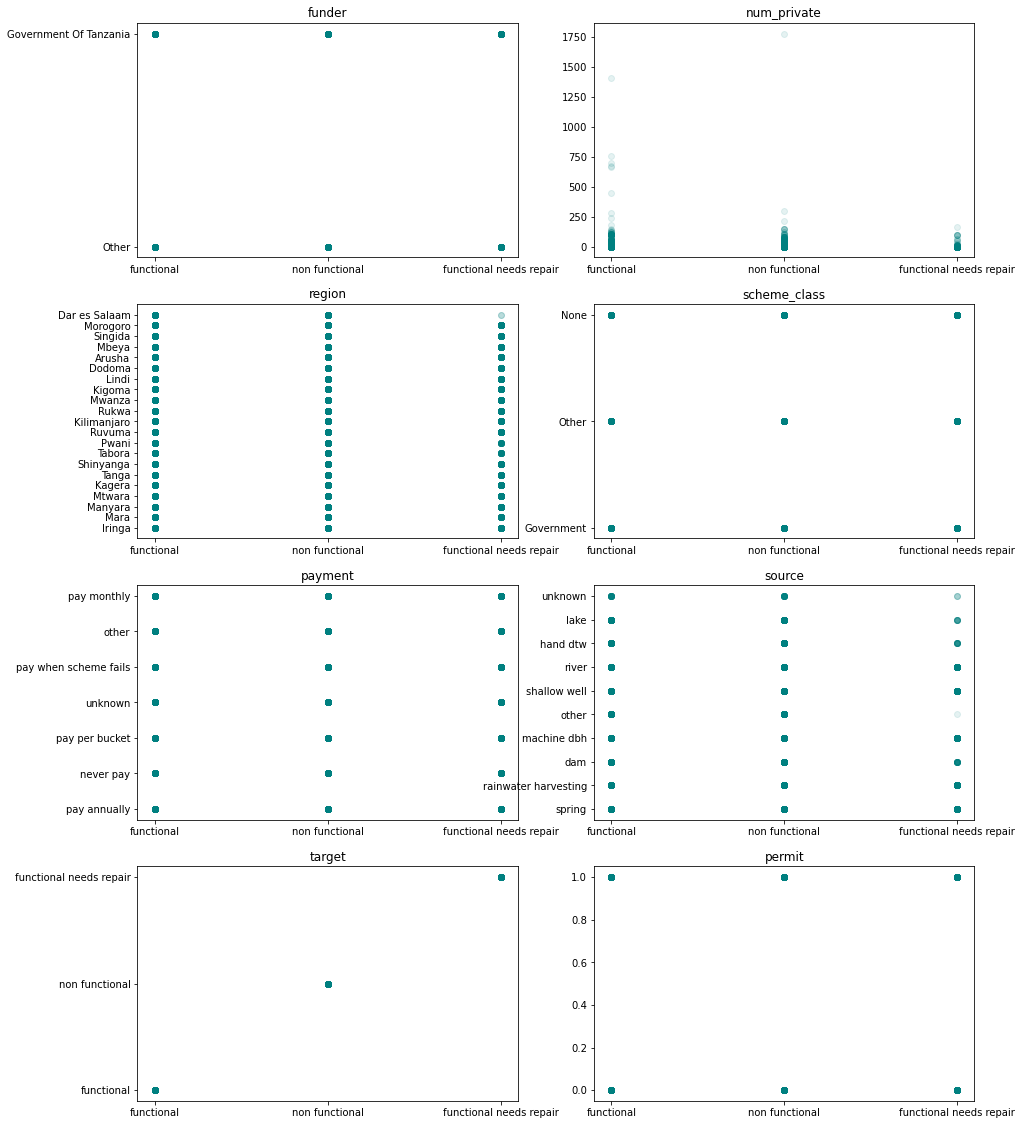

In [10]:
# Creating a large figure
fig = plt.figure(figsize=(15, 25))

# Iterating over the different plots
for i in range(0, 8):
    # Figure number starts at 1
    ax = fig.add_subplot(5, 2, i+1)
    # Add a title to make it clear what each subplot shows
    plt.title(df_pol.columns[i])
    # Use alpha to better see crossing pints
    ax.scatter(df_pol['target'], df_pol.iloc[:, i], c='teal', alpha=0.1)
    # Only show the tick marks for each target
    plt.xticks(df_pol.target.unique())

Our model shows that we would benefit from a logistic regression in comparison to a linear regression, due to our categorical variables. 

# Train/Test Split

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y = df_pol['target']
X = df_pol.drop(columns = ['target'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [12]:
from sklearn.dummy import DummyClassifier

pol_clf = DummyClassifier(strategy="most_frequent")
pol_clf.fit(X_train, y_train)



DummyClassifier(strategy='most_frequent')

pol_clf.score(X_train, y_train)


0.541967291967292

Encode Things:

from sklearn.preprocessing import Onehot




In [54]:
y_train


43069    non functional
58858        functional
41707    non functional
30674        functional
20944        functional
              ...      
54343        functional
38158        functional
860      non functional
15795        functional
56422    non functional
Name: target, Length: 41580, dtype: object

In [13]:
X_train.isna().sum()

funder          0
num_private     0
region          0
scheme_class    0
payment         0
source          0
permit          0
installer       0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

imp_mode = SimpleImputer(missing_values= np.nan, strategy='most_frequent')

imp_mode.fit(X_train)





SimpleImputer(strategy='most_frequent')

In [15]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

ohe.fit(X_train)

X_train_ohe1 = ohe.transform(X_train)
X_train_ohe = pd.DataFrame(X_train_ohe1)
X_train_ohe.columns = ohe.get_feature_names(X_train.columns)



In [16]:
X_train_ohe

,funder_Government Of Tanzania,funder_Other,num_private_0,num_private_1,num_private_2,num_private_3,num_private_4,num_private_5,num_private_6,num_private_7,...,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,permit_False,permit_True,installer_Government,installer_Other,installer_Private
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41575,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
41576,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
41577,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
41578,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [17]:
X_test_ohe1 = ohe.transform(X_train)
X_train_ohe = pd.DataFrame(X_train_ohe1)
X_train_ohe.columns = ohe.get_feature_names(X_train.columns)

# Decision Tree

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score

clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3)

clf.fit(X_train_ohe, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
X_test_ohe1 = ohe.transform(X_test)
X_test_ohe = pd.DataFrame(X_test_ohe1)
X_test_ohe.columns = ohe.get_feature_names(X_test.columns)




#X_test_ohe = ohe.transform(X_test)
y_preds = clf.predict(X_test_ohe)

print('Accuracy: ', accuracy_score(y_test, y_preds))






Accuracy:  0.5902356902356902


In [20]:
ohecols = pd.DataFrame(X_train_ohe)
ohecols.columns

Index(['funder_Government Of Tanzania', 'funder_Other', 'num_private_0',
       'num_private_1', 'num_private_2', 'num_private_3', 'num_private_4',
       'num_private_5', 'num_private_6', 'num_private_7',
       ...
       'source_rainwater harvesting', 'source_river', 'source_shallow well',
       'source_spring', 'source_unknown', 'permit_False', 'permit_True',
       'installer_Government', 'installer_Other', 'installer_Private'],
      dtype='object', length=105)

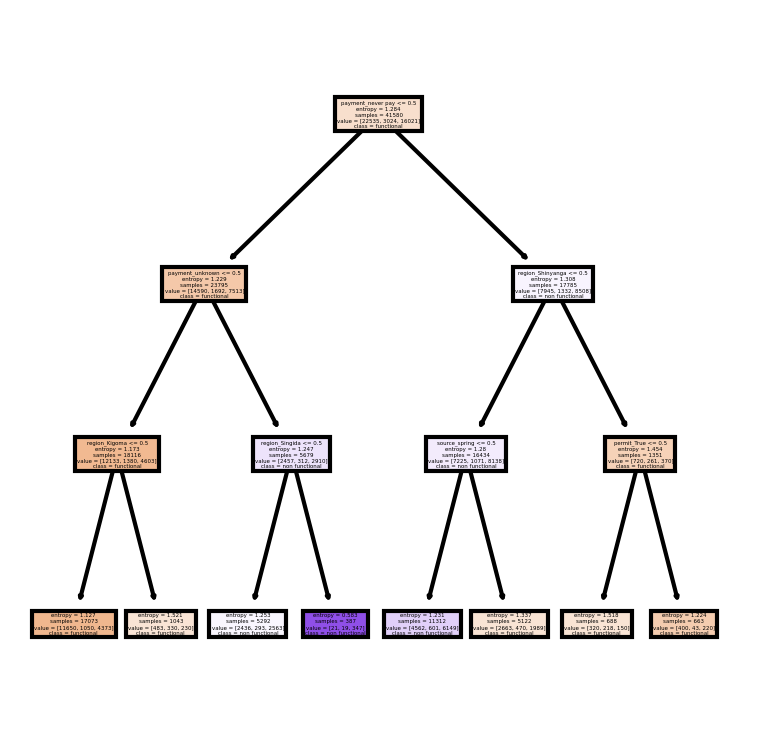

In [21]:
fig, axes = plt.subplots(nrows = 1,ncols =1 , figsize = (3,3), dpi=300)
plot_tree(clf,
               feature_names = X_train_ohe.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

payment, Region, permit, and source 

# Simple Logistic Regression

In [22]:
log_cols1 = ['permit', 'region', 'payment', 'source']

logx_train = X_train[log_cols1]
logx_test = X_test[log_cols1]





In [23]:
ohe.fit(logx_train)

logx_train_ohe1 = ohe.transform(logx_train)
logx_train_ohe = pd.DataFrame(logx_train_ohe1)
logx_train_ohe.columns = ohe.get_feature_names(logx_train.columns)

logx_test_ohe1 = ohe.transform(logx_test)
logx_test_ohe = pd.DataFrame(logx_test_ohe1)
logx_test_ohe.columns = ohe.get_feature_names(logx_test.columns)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score # we care about the false positive

logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')




model_log = logreg.fit(logx_train_ohe, y_train)
model_log


y_hat_test = logreg.predict(logx_test_ohe)
y_hat_train = logreg.predict(logx_train_ohe)


precision_score(y_test, y_hat_test, average ='weighted')


C:\Users\bjere\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5707297112116004

### K Nearest Neighbors

In [25]:
# import relevant libraries
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import KFold

In [26]:
# Validation split
X_t, X_val, y_t, y_val = train_test_split(X_train, y_train,
                                          random_state=42,
                                          test_size=0.3)

In [27]:
# encoding
X_te = ohe.fit_transform(X_t)
X_vale = ohe.transform(X_val)

In [28]:
knn = KNeighborsClassifier()

knn.fit(X_te, y_t)
print(f"training precision: {precision_score(y_t, knn.predict(X_te), average='weighted')}")
print(f"validation precision: {precision_score(y_val, knn.predict(X_vale), average='weighted')}")

training precision: 0.663837244768446
validation precision: 0.6378480812198766


In [31]:
# Kfold gradient decent

kf = KFold(n_splits=2)

k_scores_train = {}
k_scores_val = {}


for k in range(15, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    precision_score_t = []
    precision_score_v = []
    for train_ind, val_ind in kf.split(X_train, y_train):
        
        X_tb, y_tb = X_train.iloc[train_ind], y_train.iloc[train_ind] 
        X_vb, y_vb = X_train.iloc[val_ind], y_train.iloc[val_ind]
        
        X_t_ind = X_tb.index
        X_v_ind = X_vb.index
        
        X_tb = pd.DataFrame(ohe.fit_transform(X_tb))
        X_tb.index = X_t_ind
        X_vb = pd.DataFrame(ohe.transform(X_vb))
        X_vb.index = X_v_ind
        
        knn.fit(X_tb, y_tb)
        
        y_pred_tb = knn.predict(X_tb)
        y_pred_vb = knn.predict(X_vb)
        
        precision_score_t.append(precision_score(y_tb, y_pred_tb, average='weighted'))
        precision_score_v.append(precision_score(y_vb, y_pred_vb, average='weighted'))
        
        
    k_scores_train[k] = np.mean(precision_score_t)
    k_scores_val[k] = np.mean(precision_score_v)

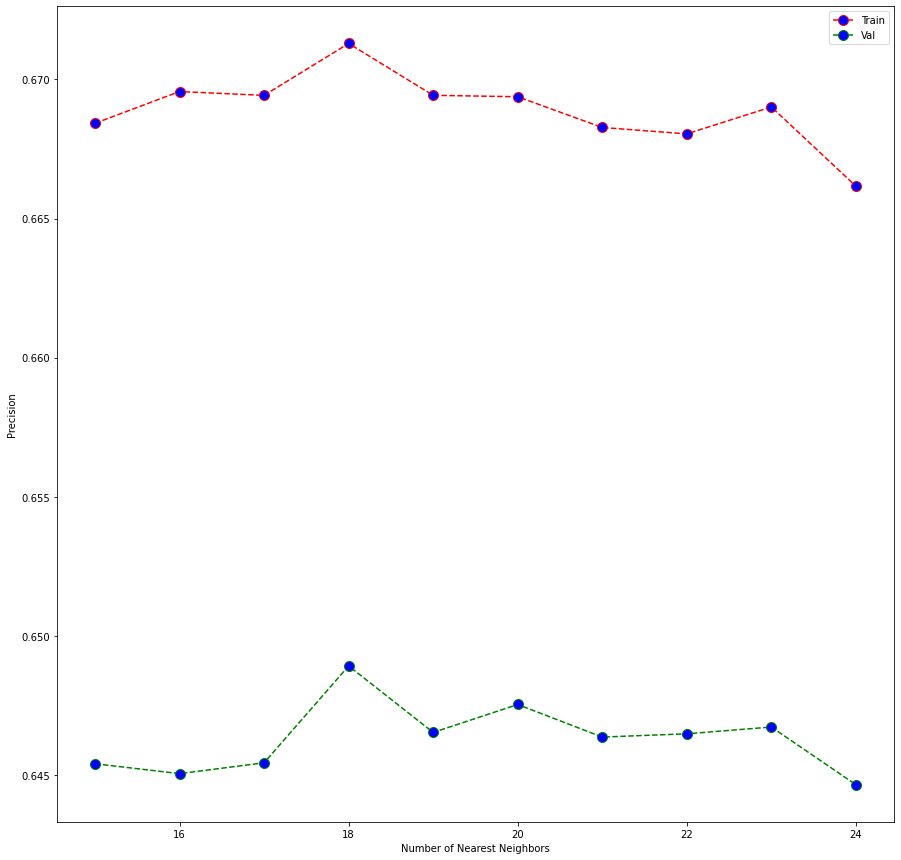

In [32]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(list(k_scores_train.keys()), list(k_scores_train.values()),
        color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Train')
ax.plot(list(k_scores_val.keys()), list(k_scores_val.values()),
        color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Val')
ax.set_xlabel('Number of Nearest Neighbors')
ax.set_ylabel('Precision')
plt.legend();

**Highest precision at n_neighbors = 18**

In [33]:
knn = KNeighborsClassifier(n_neighbors = 18)

knn.fit(X_te, y_t)
print(f"training precision: {precision_score(y_t, knn.predict(X_te), average='weighted')}")
print(f"validation precision: {precision_score(y_val, knn.predict(X_vale), average='weighted')}")

training precision: 0.6719699433204301
validation precision: 0.6601521748586447


Lets make our targets binary and try again.

In [49]:
y_ = pd.DataFrame(y)



y_.replace({'functional needs repair' : 'non functional'}, inplace=True)
print(y_.value_counts())



target        
functional        32259
non functional    27141
dtype: int64


In [53]:
# Kfold gradient decent

kf = KFold(n_splits=2)

k_scores_train = {}
k_scores_val = {}


for k in range(15, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    precision_score_t = []
    precision_score_v = []
    for train_ind, val_ind in kf.split(X, y_):
        
        X_tb, y_tb = X.iloc[train_ind], y_.iloc[train_ind] 
        X_vb, y_vb = X.iloc[val_ind], y_.iloc[val_ind]
        
        X_t_ind = X_tb.index
        X_v_ind = X_vb.index
        
        X_tb = pd.DataFrame(ohe.fit_transform(X_tb))
        X_tb.index = X_t_ind
        X_vb = pd.DataFrame(ohe.transform(X_vb))
        X_vb.index = X_v_ind
        
        knn.fit(X_tb, y_tb)
        
        y_pred_tb = knn.predict(X_tb)
        y_pred_vb = knn.predict(X_vb)
        
        precision_score_t.append(precision_score(y_tb, y_pred_tb, average='weighted'))
        precision_score_v.append(precision_score(y_vb, y_pred_vb, average='weighted'))
        
        
    k_scores_train[k] = np.mean(precision_score_t)
    k_scores_val[k] = np.mean(precision_score_v)

C:\Users\bjere\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bjere\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bjere\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\bjere\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

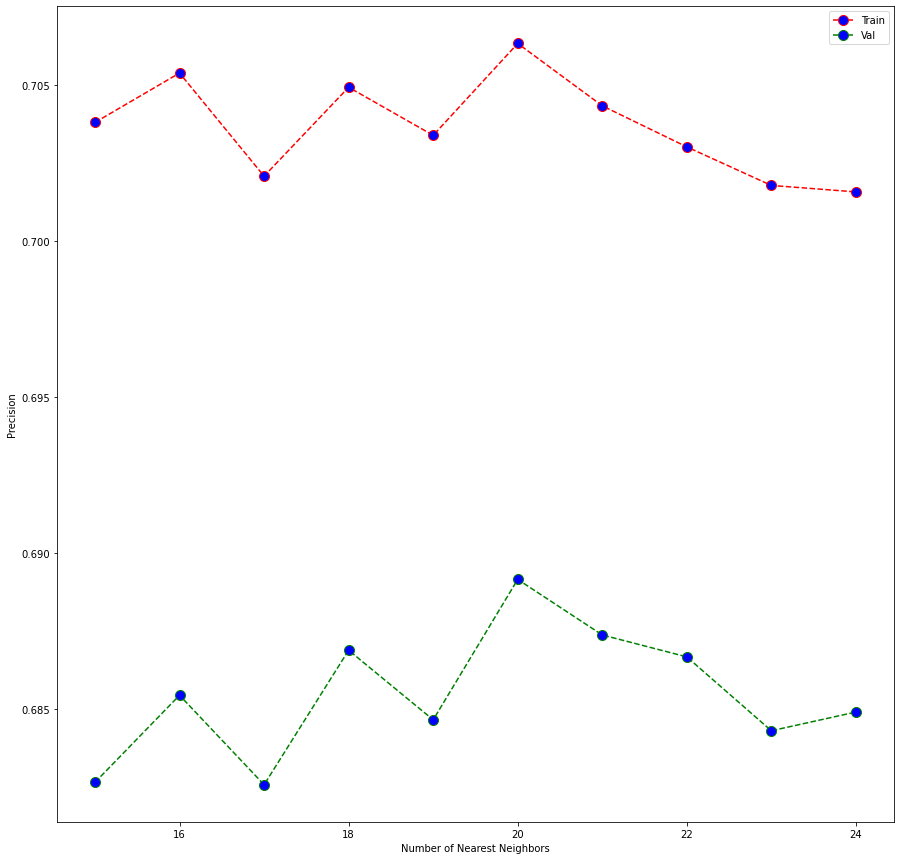

In [55]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(list(k_scores_train.keys()), list(k_scores_train.values()),
        color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Train')
ax.plot(list(k_scores_val.keys()), list(k_scores_val.values()),
        color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Val')
ax.set_xlabel('Number of Nearest Neighbors')
ax.set_ylabel('Precision')
plt.legend();

In [57]:
X_t, X_val, y_t_, y_v_ = train_test_split(X, y_, test_size = 0.3, random_state = 42)

X_te = ohe.fit_transform(X_t)
X_vale = ohe.transform(X_val)

In [59]:
knn = KNeighborsClassifier(n_neighbors = 20)

knn.fit(X_te, y_t_)
print(f"training precision: {precision_score(y_t_, knn.predict(X_te), average='weighted')}")
print(f"validation precision: {precision_score(y_v_, knn.predict(X_vale), average='weighted')}")

C:\Users\bjere\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training precision: 0.7050142225145252
validation precision: 0.6945073815178575


### SMOTE work

fixing imbalance issues with `target` for the 'functioning needs maintenance' 

In [1]:
# import relevant libraries
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [ ]:
# Balancing train set
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X_train, y_train)



#### K-Fold to determine n_neighbors

In [ ]:
kf = KFold(n_splits=2)

k_scores_train = {}
k_scores_val = {}


for k in range(15, 25):
    knn = KNeighborsClassifier(n_neighbors=k)
    precision_score_r = []
    precision_score_vr = []
    for train_ind, val_ind in kf.split(X_res, y_res):
        
        X_r, y_r = X_res.iloc[train_ind], y_res.iloc[train_ind] 
        X_vr, y_vr = X_res.iloc[val_ind], y_res.iloc[val_ind]
        
        X_t_ind = X_r.index
        X_v_ind = X_vr.index
        
        X_r = pd.DataFrame(ohe.fit_transform(X_r))
        X_r.index = X_t_ind
        X_vr = pd.DataFrame(ohe.transform(X_vr))
        X_vr.index = X_v_ind
        
        knn.fit(X_r, y_r)
        
        y_pred_r = knn.predict(X_r)
        y_pred_vr = knn.predict(X_vr)
        
        precision_score_t.append(precision_score(y_r, y_pred_r, average='weighted'))
        precision_score_v.append(precision_score(y_vr, y_pred_vr, average='weighted'))
        
        
    k_scores_train[k] = np.mean(precision_score_r)
    k_scores_val[k] = np.mean(precision_score_vr)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 15))

ax.plot(list(k_scores_train.keys()), list(k_scores_train.values()),
        color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Train')
ax.plot(list(k_scores_val.keys()), list(k_scores_val.values()),
        color='green', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10, label='Val')
ax.set_xlabel('Number of Nearest Neighbors')
ax.set_ylabel('Precision')
plt.legend();

### Naive Bayes Model

In [ ]:
# import related libraries
from sklearn.naive_bayes import GaussianNB

In [ ]:
func_prior = 32259/59400
non_funcprior = 22824/59400
func_need_repair = 4317/59400

clf = GaussianNB()
clf.fit(X_train_ohe, y_train)

print(f"training precision: {precision_score(y_train, clf.predict(X_train_ohe), average='weighted')}")
print(f"validation precision: {precision_score(y_test, clf.predict(X_test_ohe), average='weighted')}")
